# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | laojunmiao
Processing Record 3 of Set 1 | novodvinsk
Processing Record 4 of Set 1 | jinshi
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | manay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | huanuni
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | lae
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | alesund
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | saint-denis
Processing Record 19 of Set 1 | vilyuysk
Processing Record 20 of Set 1 | harrison
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | bodo
Processing Record 23 of Set 1 | punta 

Processing Record 39 of Set 4 | klyuchi
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | saurimo
Processing Record 42 of Set 4 | lincoln city
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | anka
Processing Record 45 of Set 4 | selfoss
Processing Record 46 of Set 4 | olyokminsk
Processing Record 47 of Set 4 | adamovka
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | sterling
Processing Record 0 of Set 5 | general jose de san martin
Processing Record 1 of Set 5 | gebeit
Processing Record 2 of Set 5 | tolanaro
Processing Record 3 of Set 5 | ciudad melchor muzquiz
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | hayma'
City not found. Skipping...
Processing Record 6 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 5 | kembe
Processing Record 8 of Set 5 | jumla
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | nassau
Processing Record 11 of Set 5 | s

Processing Record 31 of Set 8 | kerikeri
Processing Record 32 of Set 8 | yangiyul
Processing Record 33 of Set 8 | lethem
Processing Record 34 of Set 8 | pacifica
Processing Record 35 of Set 8 | fort morgan
Processing Record 36 of Set 8 | chonchi
Processing Record 37 of Set 8 | shamakhi
Processing Record 38 of Set 8 | aldan
Processing Record 39 of Set 8 | pontianak
Processing Record 40 of Set 8 | temiskaming shores
Processing Record 41 of Set 8 | auburn
Processing Record 42 of Set 8 | guerrero negro
Processing Record 43 of Set 8 | kyzyl-mazhalyk
Processing Record 44 of Set 8 | bamboo flat
Processing Record 45 of Set 8 | keren
Processing Record 46 of Set 8 | manicore
Processing Record 47 of Set 8 | ilhabela
Processing Record 48 of Set 8 | goondiwindi
Processing Record 49 of Set 8 | vernon
Processing Record 0 of Set 9 | kapa'a
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | mont-laurier
Processing Record 3 of Set 9 | mount gambier
Processing Record 4 of Set 9 | l

Processing Record 24 of Set 12 | sola
Processing Record 25 of Set 12 | sihanoukville
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | pantai remis
Processing Record 29 of Set 12 | slobozia bradului
Processing Record 30 of Set 12 | kismayo
Processing Record 31 of Set 12 | waingapu
Processing Record 32 of Set 12 | cooper's town
Processing Record 33 of Set 12 | amos
Processing Record 34 of Set 12 | forster
Processing Record 35 of Set 12 | suva
Processing Record 36 of Set 12 | mana
Processing Record 37 of Set 12 | fauske
Processing Record 38 of Set 12 | axim
Processing Record 39 of Set 12 | kukuna
Processing Record 40 of Set 12 | loiza
Processing Record 41 of Set 12 | two rivers
Processing Record 42 of Set 12 | meadow lakes
Processing Record 43 of Set 12 | muynoq
Processing Record 44 of Set 12 | beardstown
Processing Record 45 of Set 12 | kerema
Processing Record 46 of Set 12 | kintampo
Processing Record 47 of Set 12 

In [4]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,25.51,94,100,3.15,JP,1693776444
1,laojunmiao,39.8333,97.7333,21.11,22,100,2.91,CN,1693776444
2,novodvinsk,64.4165,40.8122,13.56,85,93,2.18,RU,1693776444
3,jinshi,29.6049,111.8701,20.58,87,68,0.91,CN,1693776444
4,enewetak,11.3474,162.3373,28.70,74,87,3.37,MH,1693776445


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,25.51,94,100,3.15,JP,1693776444
1,laojunmiao,39.8333,97.7333,21.11,22,100,2.91,CN,1693776444
2,novodvinsk,64.4165,40.8122,13.56,85,93,2.18,RU,1693776444
3,jinshi,29.6049,111.8701,20.58,87,68,0.91,CN,1693776444
4,enewetak,11.3474,162.3373,28.70,74,87,3.37,MH,1693776445


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

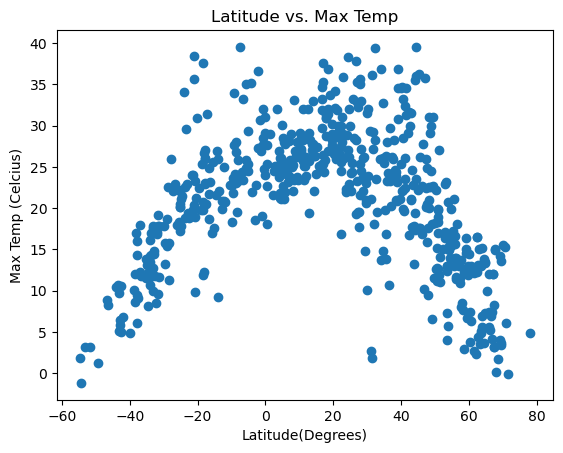

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude(Degrees)")
plt.ylabel("Max Temp (Celcius)")



# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

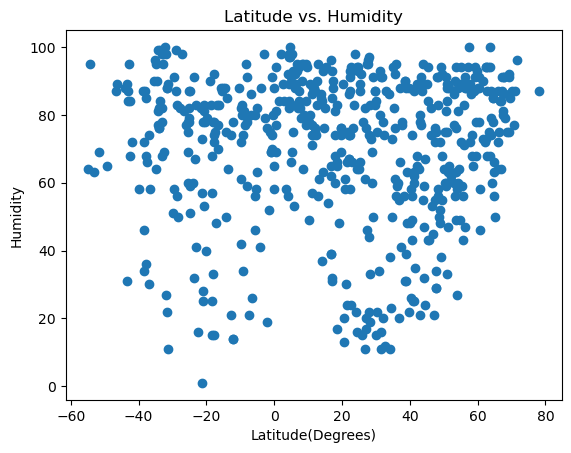

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude(Degrees)")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

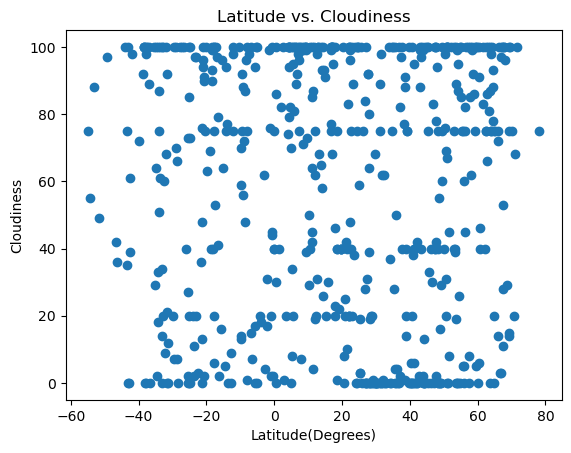

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude(Degrees)")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

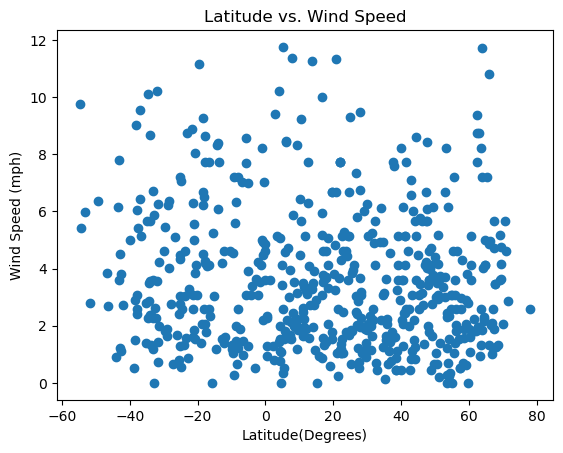

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude(Degrees)")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,25.51,94,100,3.15,JP,1693776444
1,laojunmiao,39.8333,97.7333,21.11,22,100,2.91,CN,1693776444
2,novodvinsk,64.4165,40.8122,13.56,85,93,2.18,RU,1693776444
3,jinshi,29.6049,111.8701,20.58,87,68,0.91,CN,1693776444
4,enewetak,11.3474,162.3373,28.70,74,87,3.37,MH,1693776445


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,waitangi,-43.9535,-176.5597,10.46,88,100,0.89,NZ,1693776445
8,port-aux-francais,-49.3500,70.2167,1.21,65,97,6.37,TF,1693776445
10,huanuni,-18.2667,-66.8500,11.89,15,90,9.27,BO,1693776446
12,port mathurin,-19.6833,63.4167,22.49,79,63,11.17,MU,1693776446
13,lae,-6.7221,146.9847,23.37,86,100,1.46,PG,1693776446


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.45660637996982567


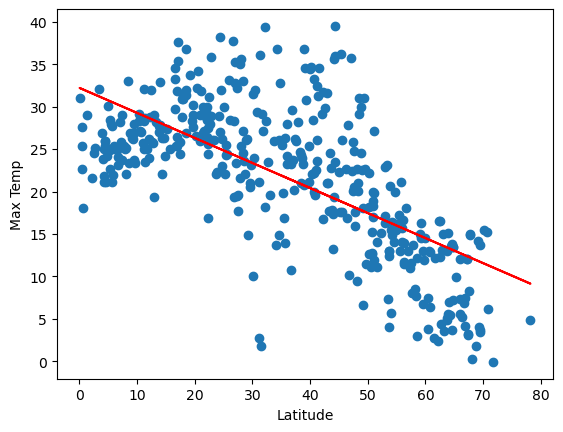

In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression(x_values, y_values, "Max Temp",(6,-10))



The r-value is: 0.6226754950747978


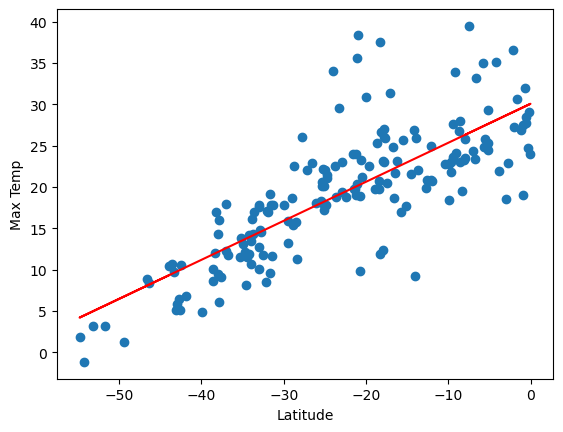

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression(x_values, y_values, "Max Temp",(6,-10))

**Discussion about the linear relationship:** Neither of these is a very good fit line based on their r-value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00020687281942256402


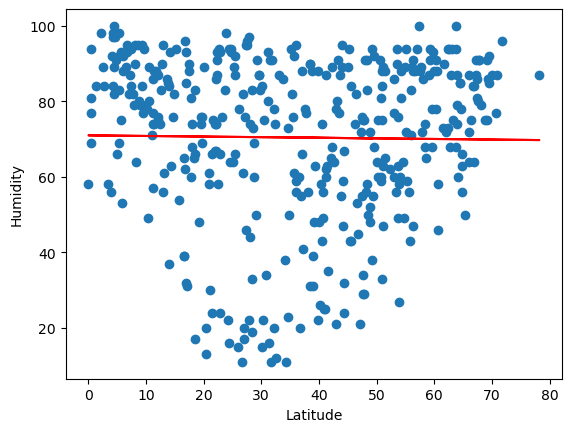

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.015748775189843064


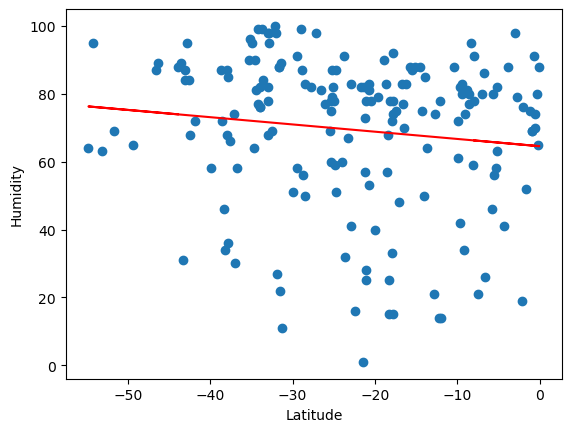

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression(x_values, y_values, "Humidity",(6,-10))

**Discussion about the linear relationship:** This is a very bad set of r-values signifying very little correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0017503925140443086


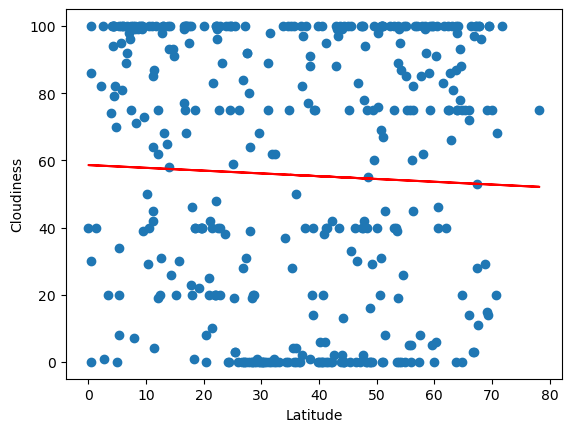

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression(x_values, y_values, "Cloudiness",(6,-10))

The r-value is: 0.004613221968666969


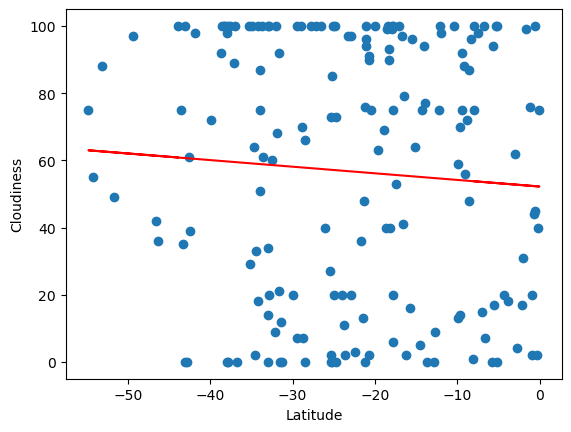

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression(x_values, y_values, "Cloudiness",(6,-10))

**Discussion about the linear relationship:** Very poor r-values signifying very little coordination.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0005163361872182124


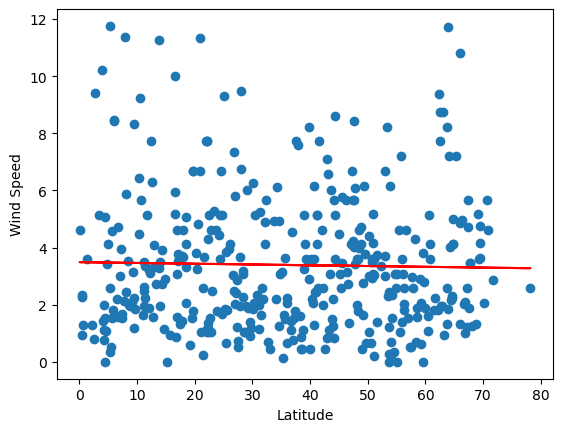

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression(x_values, y_values, "Wind Speed",(6,-10))

The r-value is: 0.0011739001949692878


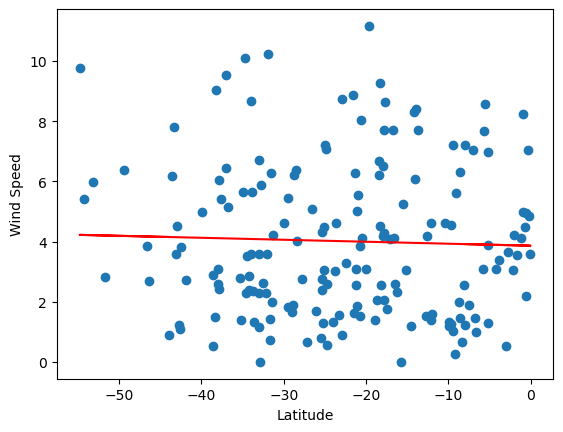

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression(x_values, y_values, "Wind Speed",(6,-10))

**Discussion about the linear relationship:** Very poor r-values signifying very little coordination.